**DEFININDO UMA ARQUITETURA NO PUTORCH**

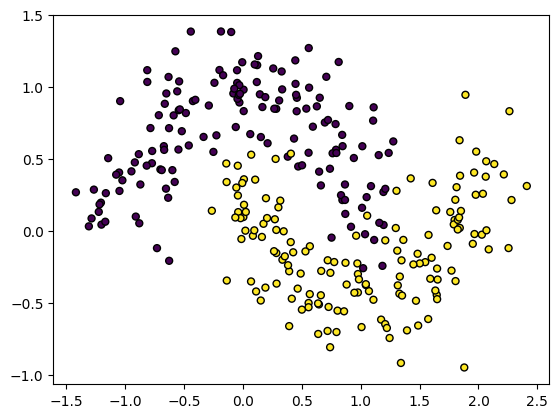

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker = 'o', c = Y1, s = 25, edgecolor = 'k')

MODULO nn.Sequencial

In [ ]:
import torch
from torch import nn

input_size = 2
hidden_size = 8
output_size = 1
net = nn.Sequential(nn.Linear(input_size, hidden_size), # hidden
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(hidden_size, output_size))   # output

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


Summary da biblioteca torchsummary permite visualizar mais informações sobre a nossa rede, como quantidade de parâmetros, e o tamanho que cada elemento ocupa na memória

In [ ]:
from torchsummary import summary

summary(net, input_size=(1, input_size))

FAZENDO O FORWARD

In [ ]:
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


MODULO nn.Module

In [ ]:
class Minharede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):                      #DEFINE A ARQUITETURA

    super(Minharede, self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)


  def forward(self, X):                                                          #GERAR UMA SAIDA APARTIR DO X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

INSTANCIANDO REDE

In [ ]:
net = Minharede(input_size, hidden_size, output_size)
print(net)

Minharede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


FORWARD

In [ ]:
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


SUBINDO PARA GPU

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else: device = torch.device('cpu')

print(device)

cuda


In [ ]:
net = Minharede(input_size, hidden_size, output_size)
net.to(device)
print(net)



Minharede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])
